In [78]:
import pandas as pd
import os

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

## About Dataset
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Relevant papers
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. (PDF)

age: the age of an individual Integer greater than 0

workclass: a general term to represent the employment status of an individual Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: this is the number of people the census believes the entry represents. Integer greater than 0

education: the highest level of education achieved by an individual. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: the highest level of education achieved in numerical form. Integer greater than 0

marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: the general type of occupation of an individual Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Descriptions of an individual’s race White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: the biological sex of the individual Male, female

capital-gain: capital gains for an individual Integer greater than or equal to 0

capital-loss: capital loss for an individual Integer greater than or equal to 0

hours-per-week: the hours an individual has reported to work per week continuous

native-country: country of origin for an individual United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

the label: whether or not an individual makes more than $50,000 annually. <= 50K, >50K

In [81]:
df = pd.read_csv("D:/Projects/Adult-Census-Income-Prediction/data_given/adult.csv")

In [82]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
print("\n EDA on Complete dataset\n")
print("*"*90)
print("\nFeatures\columns:\n {}".format(df.columns))
print("*"*90)
print("\n\nNo of Rows: {}".format(df.shape[1]))
print("*"*90)
print("\n\nData Type: \n {}".format(df.dtypes))
print("*"*90)
print("\nContains nan values in the cells: {}\n".format(df.isna().values.any()))
print("*"*90)
print("\nTotal Empty cells by columns :\n{}".format(df.isna().sum()),"\n\n")
print("*"*90)


 EDA on Complete dataset

******************************************************************************************

Features\columns:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')
******************************************************************************************


No of Rows: 15
******************************************************************************************


Data Type: 
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object
*********************

In [85]:
df.shape

(32561, 15)

In [86]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [88]:
df.columns=df.columns.str.lower()

In [89]:
df.columns=df.columns.str.replace('-', '_')

In [90]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'salary'],
      dtype='object')

In [91]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [92]:
df.duplicated().sum()

24

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.duplicated().sum()

0

In [95]:
df.nunique()


age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
country              42
salary                2
dtype: int64

In [96]:
df.age.max()

90

In [97]:
df.age.min()

17

In [98]:
df.age.median()

37.0

<Axes: xlabel='age', ylabel='Count'>

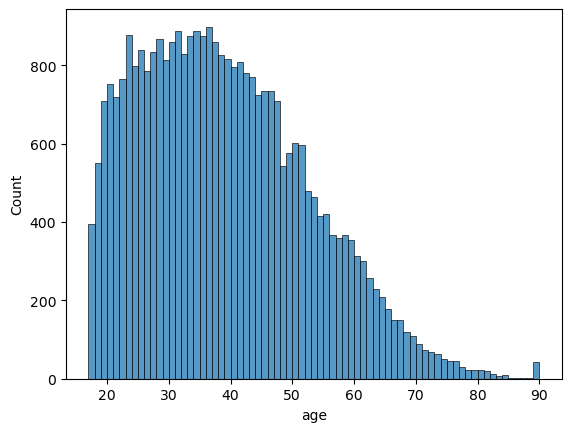

In [99]:
sns.histplot(df.age, bins=73)

In [100]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

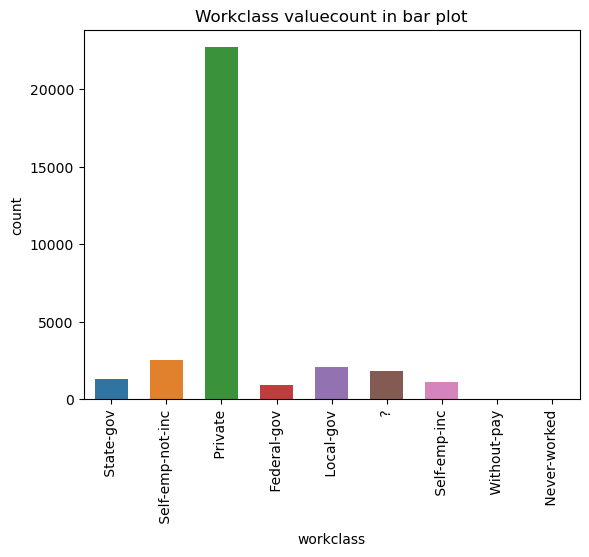

In [101]:
sns.countplot(x=df.workclass,width=0.6, )
plt.title("Workclass valuecount in bar plot")
plt.xticks(rotation=90)

In [102]:
df.workclass.value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Now, here we can see that it consist of missing value as ?, Now what it means
python will only detect NaN as missing not ?. so we have to encode this to NaN and then see.

In [103]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("len of categorical_feature:",len(categorical_feature))

len of categorical_feature: 9


In [104]:
# there is an extra space before each value of categorical column so correct it.
for col in categorical_feature:
    df[col] = df[col].str.strip()

In [105]:
df["workclass"]=='?'

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32537, dtype: bool

In [106]:
df['workclass'] = np.where(df['workclass']=='?',np.NaN, df['workclass'])

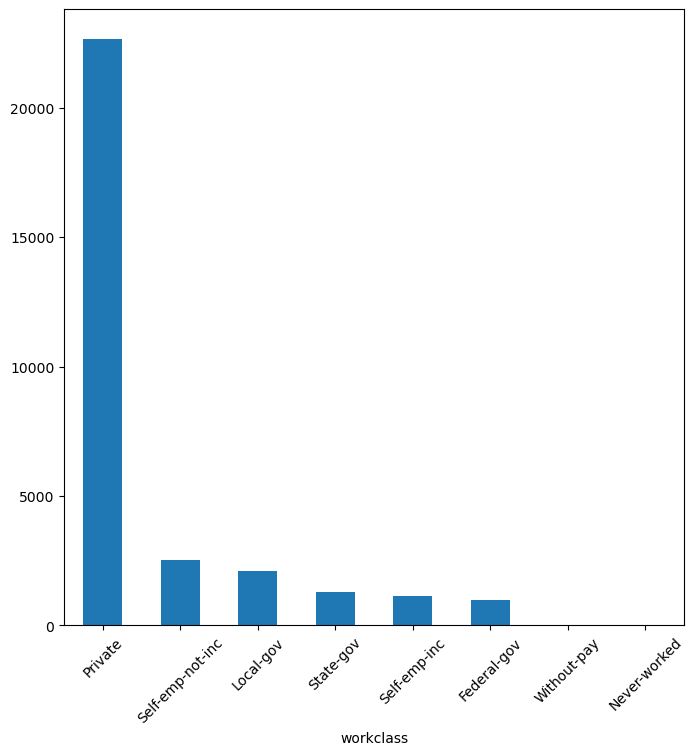

In [107]:
plt.figure(figsize=(8,8))
df['workclass'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [108]:
df[categorical_feature].head()

,workclass,education,marital_status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [109]:
df.fnlwgt.value_counts()

fnlwgt
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: count, Length: 21648, dtype: int64

In [110]:
df.drop("fnlwgt", axis=1, inplace=True)

In [111]:
df.education.value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

In [112]:
def plot(data,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    data.value_counts().plot.pie(autopct='%.0f%%')
    plt.title("pie chart for {} column".format(col_name))
    plt.show()
    

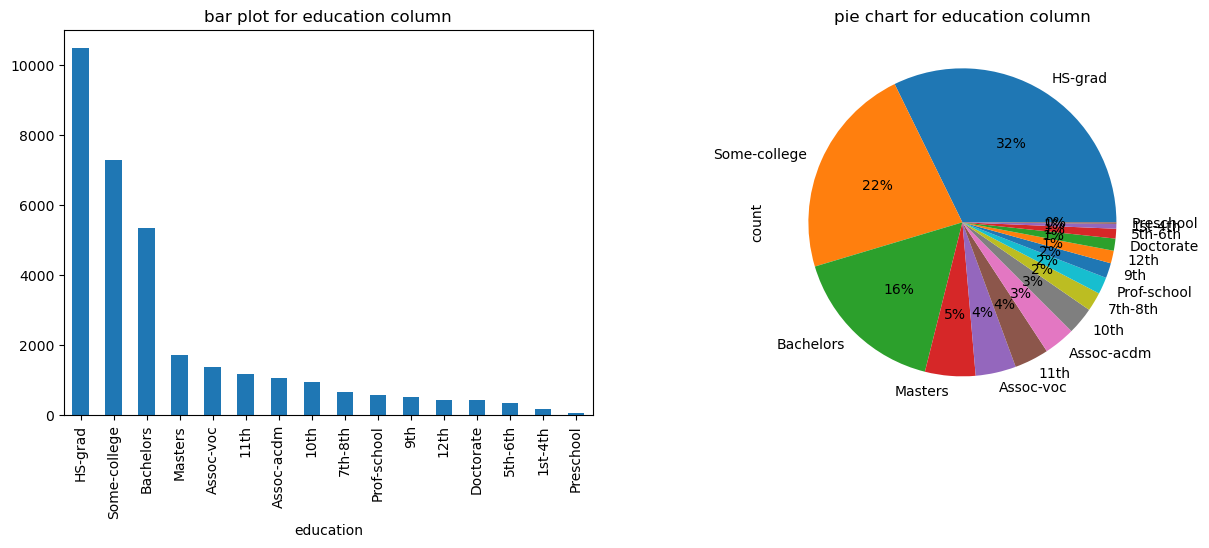

In [113]:
plot(df.education, 'education')

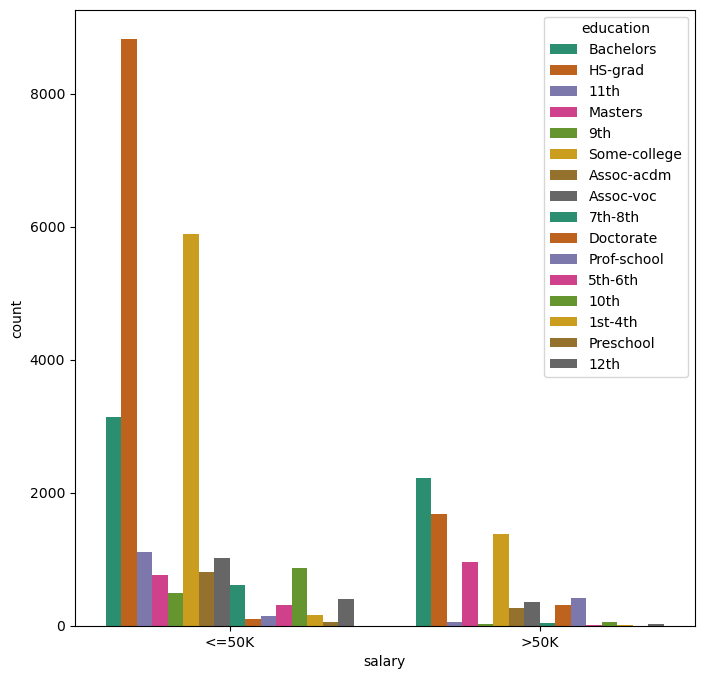

In [114]:
# Education
plt.figure(figsize=(8,8))
#data['education'].value_counts().plot(kind='bar')
sns.countplot(x='salary',hue='education',data=df,palette='Dark2')
plt.show()

In [116]:
df.education_num.value_counts()

education_num
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: count, dtype: int64

In [119]:
df.education.value_counts().sort_values()

education
Preschool          50
1st-4th           166
5th-6th           332
Doctorate         413
12th              433
9th               514
Prof-school       576
7th-8th           645
10th              933
Assoc-acdm       1067
11th             1175
Assoc-voc        1382
Masters          1722
Bachelors        5353
Some-college     7282
HS-grad         10494
Name: count, dtype: int64

In [123]:
df.groupby('education')['education_num'].unique().sort_values()

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: education_num, dtype: object

In [117]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
df.marital_status

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: marital_status, Length: 32537, dtype: object

In [39]:
df.marital_status.nunique()

7

In [40]:
df.marital_status.value_counts()

marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

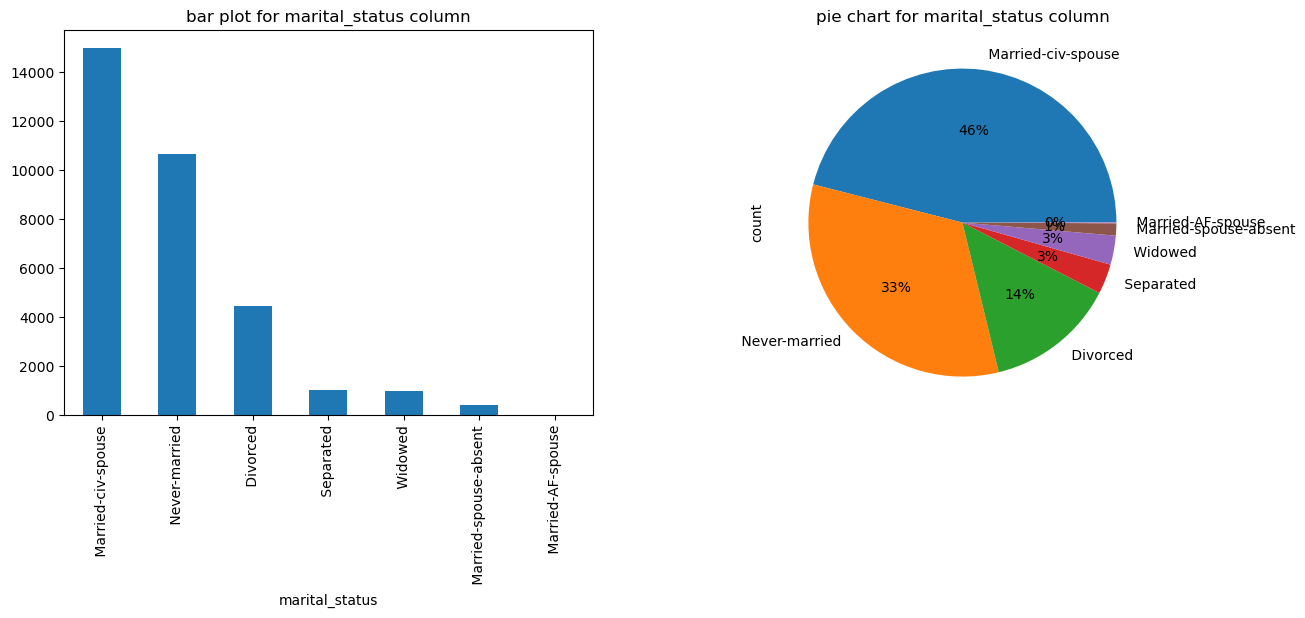

In [41]:
plot(df.marital_status, "marital_status")

In [42]:
df.occupation

0              Adm-clerical
1           Exec-managerial
2         Handlers-cleaners
3         Handlers-cleaners
4            Prof-specialty
                ...        
32556          Tech-support
32557     Machine-op-inspct
32558          Adm-clerical
32559          Adm-clerical
32560       Exec-managerial
Name: occupation, Length: 32537, dtype: object

In [145]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [146]:
# same problem in occupation is there
df['occupation'] = np.where(df['occupation']=='?',np.NaN, df['occupation'])

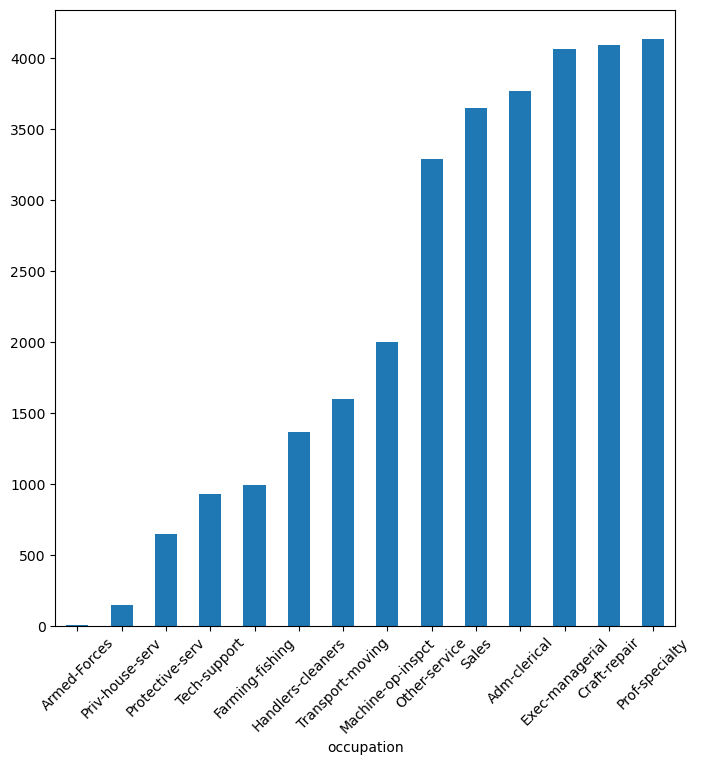

In [144]:
plt.figure(figsize=(8,8))
df['occupation'].value_counts().sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

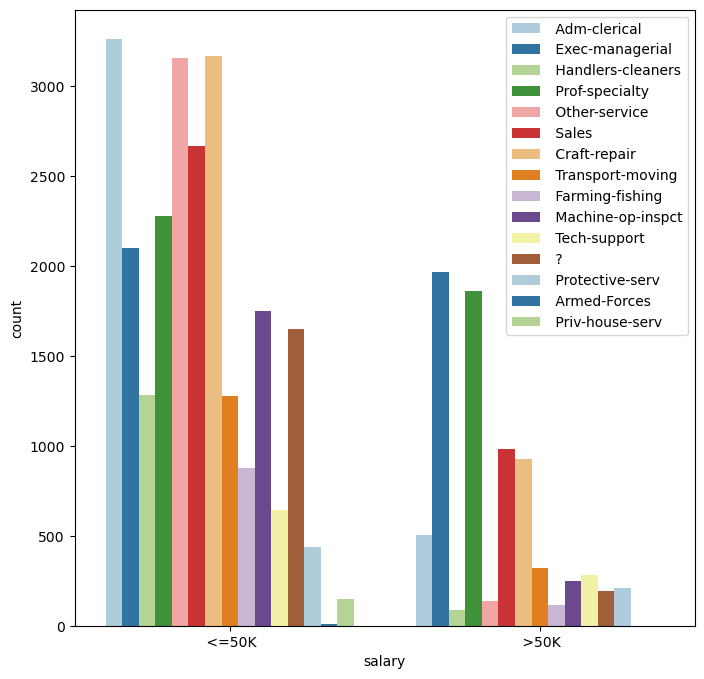

In [46]:
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='occupation',data=df,palette='Paired')
plt.legend(loc='best')
plt.show()

In [47]:
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
# relationship
df['relationship'].value_counts()

relationship
 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

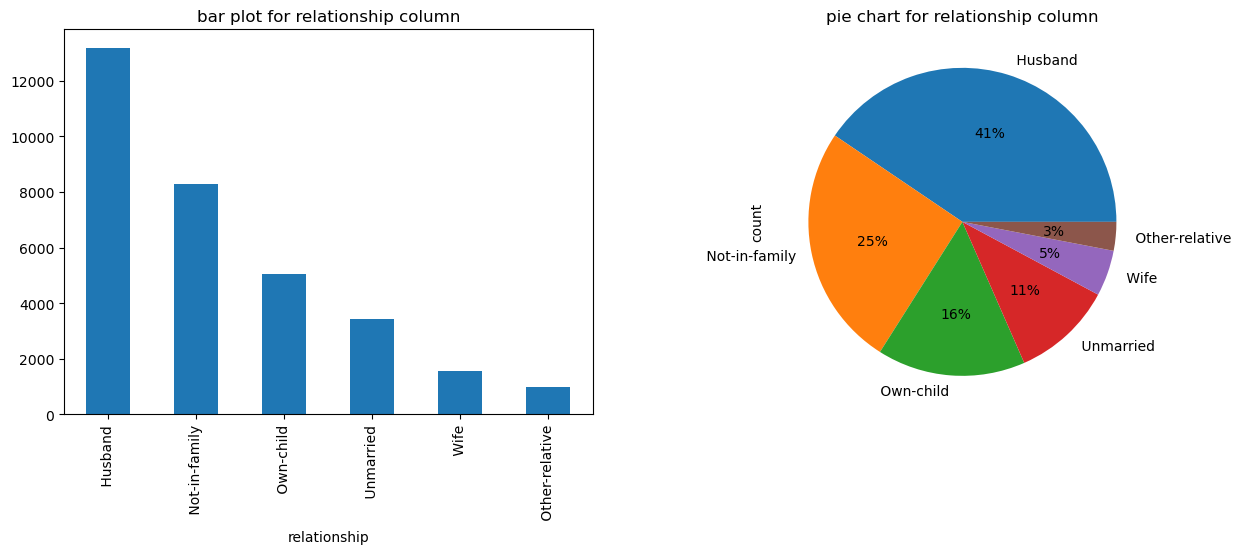

In [49]:
plot(df['relationship'], "relationship")

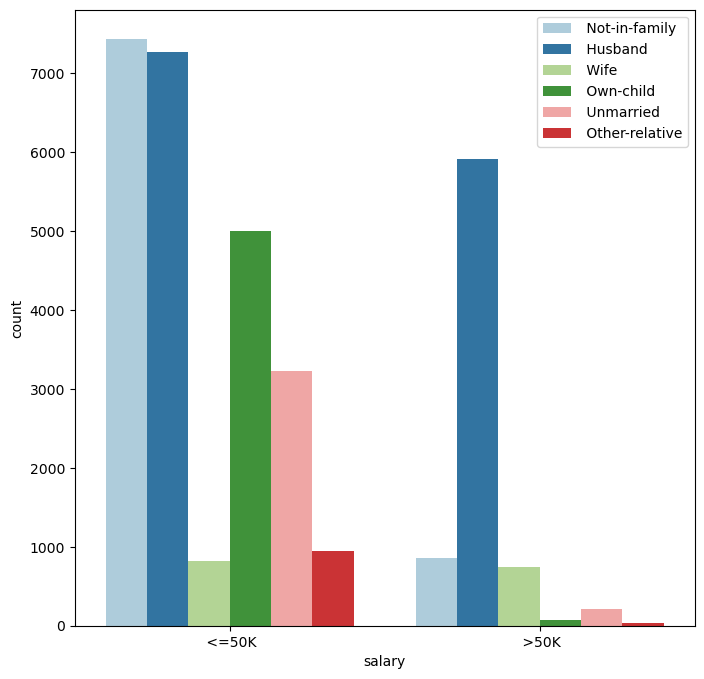

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='relationship',data=df,palette='Paired')
plt.legend(loc='best')
plt.show()

In [51]:
# RACE

In [52]:
df.race.value_counts()

race
 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

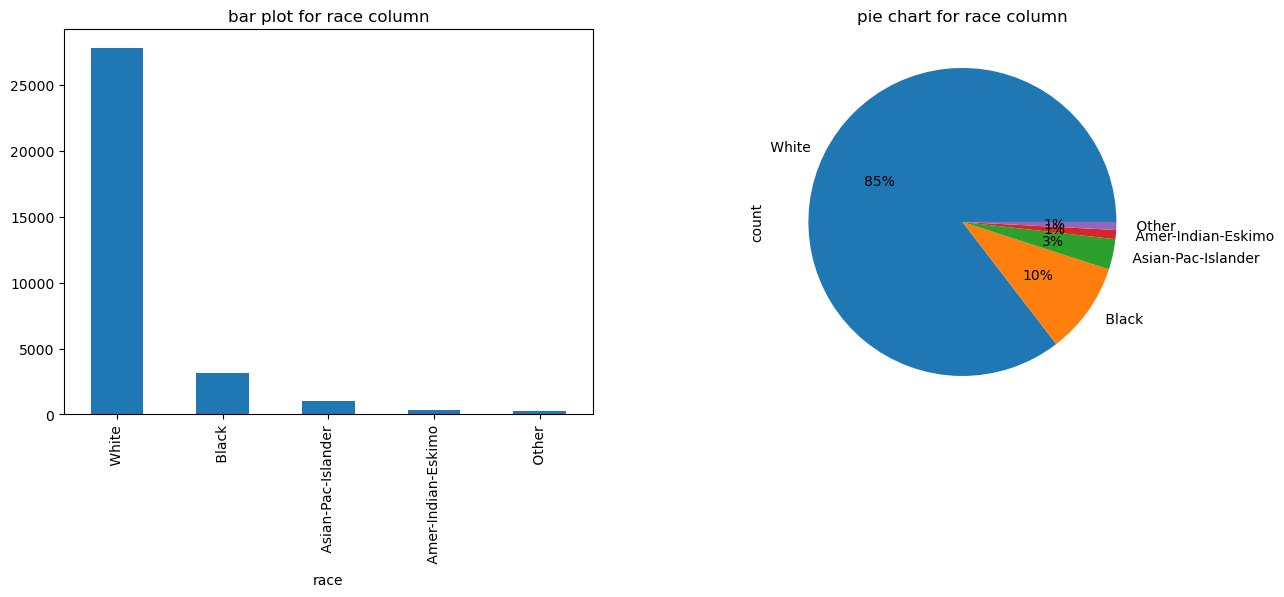

In [53]:
plot(df.race, 'race')

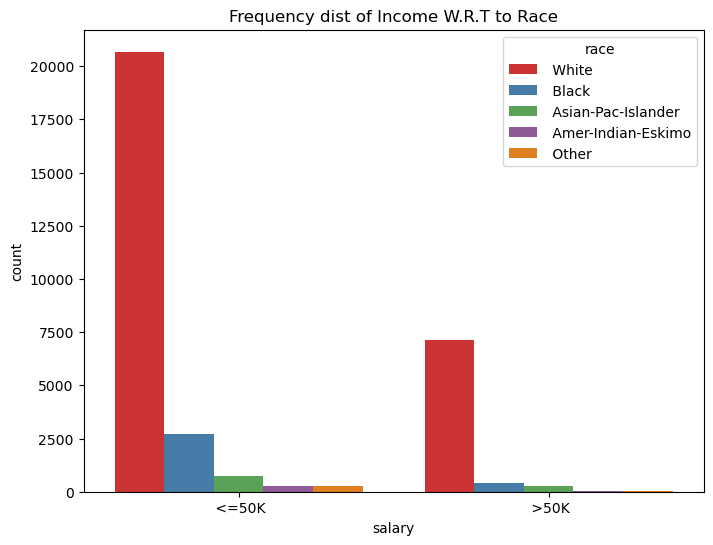

In [54]:
# let's see salary with respect to race
plt.figure(figsize=(8,6))
sns.countplot(x='salary',hue='race',data=df,palette='Set1')
plt.title("Frequency dist of Income W.R.T to Race")
plt.show()

In [55]:
# SEX

In [56]:
df.sex.value_counts()

sex
 Male      21775
 Female    10762
Name: count, dtype: int64

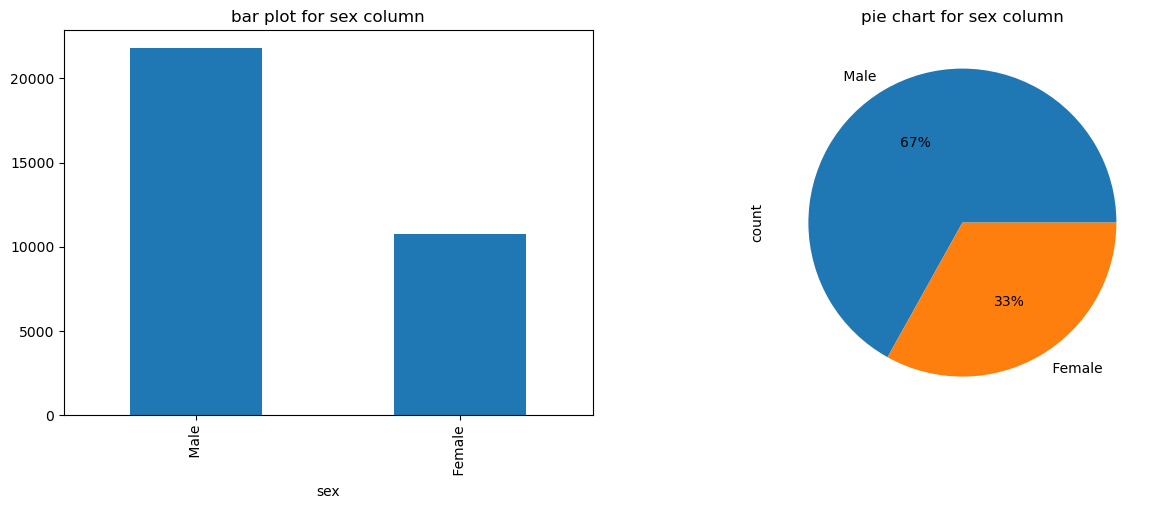

In [57]:
plot(df.sex, 'sex')

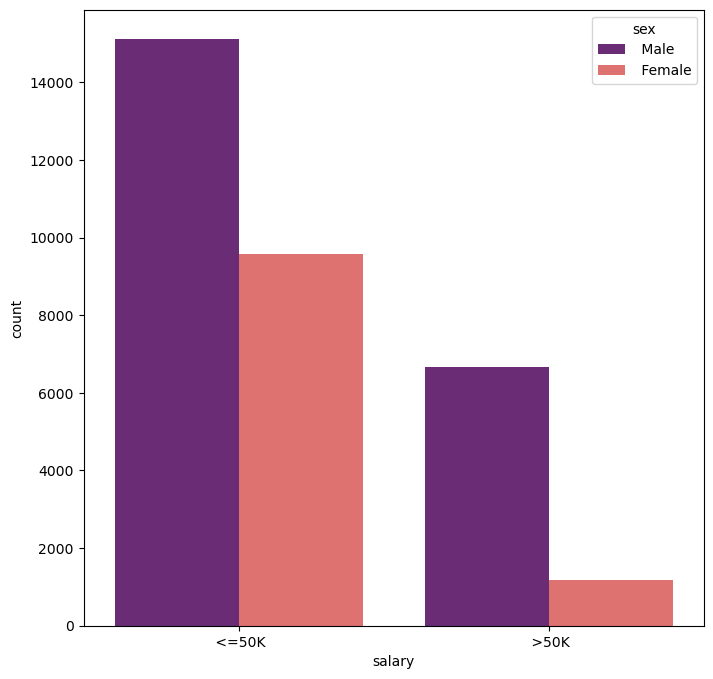

In [58]:
# let's see income with respect to sex
plt.figure(figsize=(8,8))
sns.countplot(x='salary',hue='sex',data=df,palette='magma')
plt.show()

- By seeing this we can say that whether the salary is whatever the ferquency of male is more in both the fields then female.

In [60]:
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
# COUNTRY

In [63]:
df.country

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: country, Length: 32537, dtype: object

In [75]:
df.country.value_counts()

country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

In [148]:
df['country'].replace('?',np.NaN,inplace=True) 

In [149]:
df.country.value_counts()

country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

NUMERICAL fEATURES

In [125]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print("len of numerical_feature:",len(numerical_feature))

len of numerical_feature: 5


In [127]:
df[numerical_feature].head()


,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


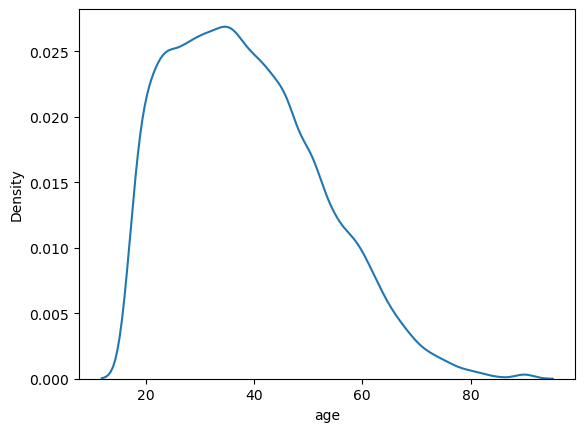

In [129]:
sns.set_color_codes()
sns.distplot(df['age'],hist=False)
plt.show()

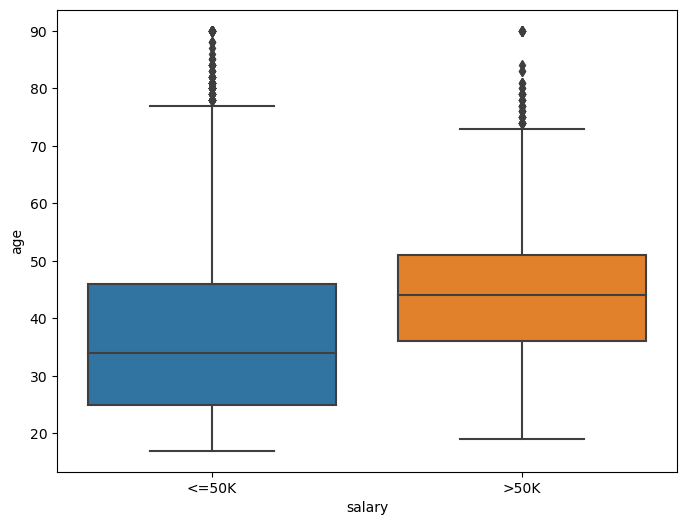

In [132]:
# Income wrt age
plt.figure(figsize=(8,6))
sns.boxplot(x='salary',y='age',data=df)
plt.show()

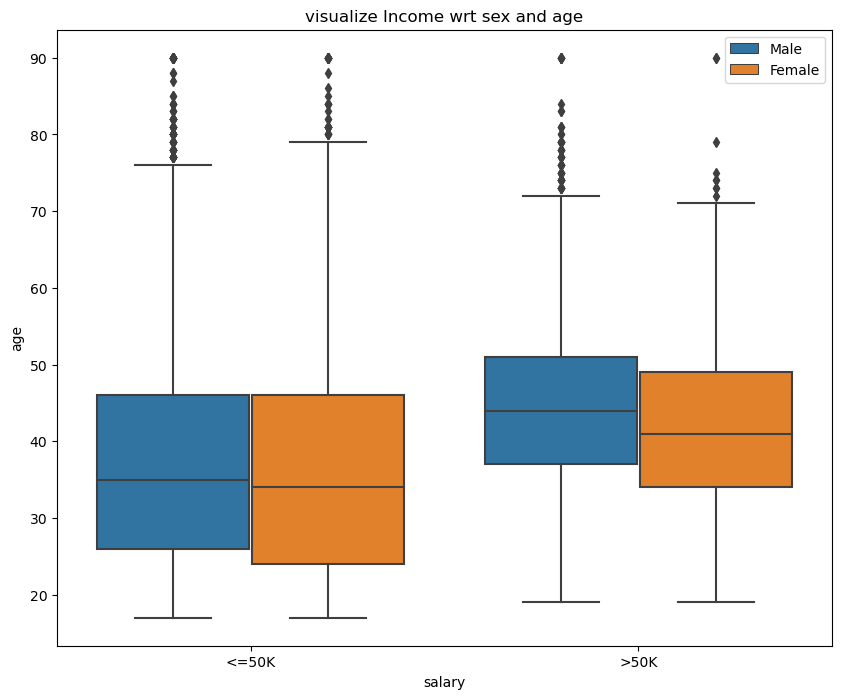

In [133]:
# Income wrt age
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='age',hue='sex',data=df)
ax.set_title("visualize Income wrt sex and age")
ax.legend(loc='best')
plt.show()

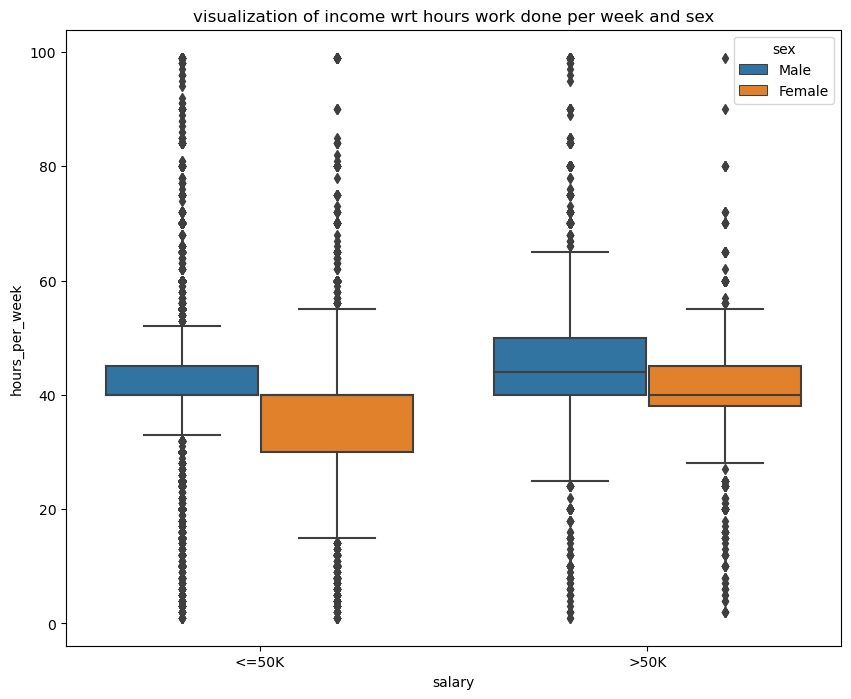

In [135]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='salary',y='hours_per_week',hue='sex',data=df)
ax.set_title("visualization of income wrt hours work done per week and sex")
plt.show()

In [137]:
df.salary.value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

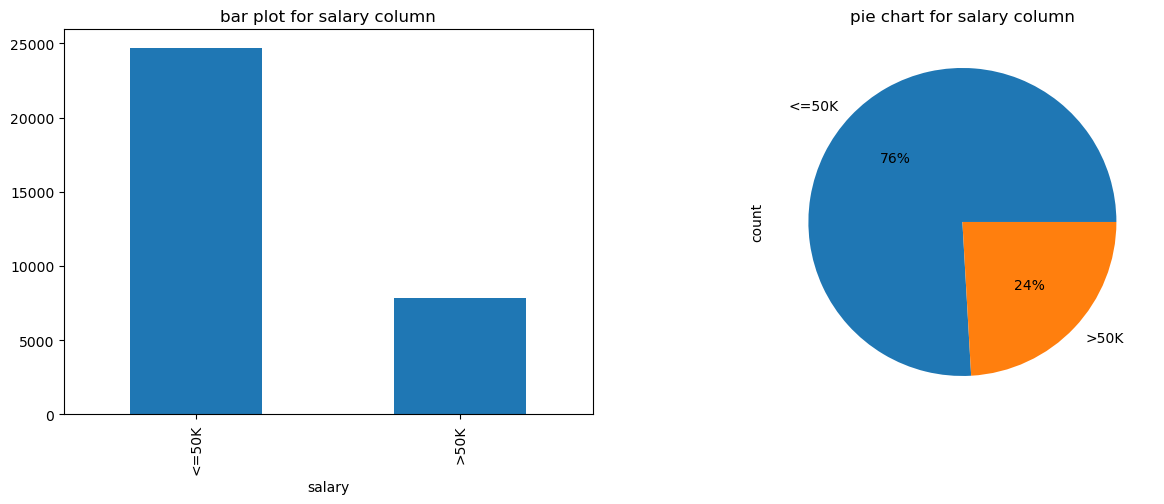

In [138]:
plot(df.salary, 'salary')

Impute missing values

In [150]:
df[categorical_feature].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
country            582
salary               0
dtype: int64

In [152]:
for col in categorical_feature:
    if (df[col].isnull().mean()>0):
        print(col, ' ', df[col].isnull().mean())

workclass   0.05642806650889756
occupation   0.05664320619602299
country   0.017887328272428313


In [154]:
df['workclass'].mode()[0]

'Private'

In this case we can use Frequent Category Imputation and Random Sampling Imputation Both. both will work fine.

In [157]:
df.workclass.fillna(df.workclass.mode(), inplace=True)

In [158]:
df.occupation.fillna(df.occupation.mode(), inplace=True)

In [159]:
df.country.fillna(df.country.mode(), inplace=True)

In [164]:
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Categorical Encoding

In [162]:
categorical_feature

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [163]:
from sklearn.preprocessing import LabelEncoder

In [169]:
df.sex = pd.get_dummies(df.sex, drop_first=True, dtype='int')

In [174]:
df.salary = pd.get_dummies(df.salary, drop_first=True, dtype='int')

In [175]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0
